In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd Downloads

/Users/peyjmonahmad/Downloads


# Pitch classification

In [4]:
df = pd.read_csv('pitches')

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,...,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,created_at,added_at,modified_at,modified_by
0,14143226,286874,2011,2011-03-31,108,118,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
1,14143227,286874,2011,2011-03-31,108,118,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
2,14143228,286874,2011,2011-03-31,108,118,1,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
3,14143229,286874,2011,2011-03-31,108,118,1,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
4,14143230,286874,2011,2011-03-31,108,118,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1


In [6]:
df.columns

Index(['uid', 'game_pk', 'year', 'date', 'team_id_b', 'team_id_p', 'inning',
       'top', 'at_bat_num', 'pcount_at_bat',
       ...
       'runner7_start', 'runner7_end', 'runner7_event', 'runner7_score',
       'runner7_rbi', 'runner7_earned', 'created_at', 'added_at',
       'modified_at', 'modified_by'],
      dtype='object', length=125)

Before it's time to build and evaluate models, we will perform some exploratory data analysis to get a better understanding of the data that we're working with.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718961 entries, 0 to 718960
Columns: 125 entries, uid to modified_by
dtypes: float64(80), int64(25), object(20)
memory usage: 685.7+ MB


In [8]:
df.describe()

,uid,game_pk,year,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,...,runner6_rbi,runner6_earned,runner7_id,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,modified_by
count,7.189610e+05,718961.000000,718961.0,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,718961.0
mean,1.701980e+07,288557.611823,2011.0,128.787182,128.757296,5.033796,0.508900,39.301513,2.865276,37.357196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,1.665143e+06,3642.210956,0.0,14.281039,14.306711,2.692326,0.499921,23.320725,1.715068,30.690569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,1.414323e+07,286874.000000,2011.0,108.000000,108.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,1.557356e+07,287507.000000,2011.0,115.000000,115.000000,3.000000,0.000000,19.000000,1.000000,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,1.703106e+07,288129.000000,2011.0,134.000000,134.000000,5.000000,1.000000,39.000000,3.000000,28.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,1.845894e+07,288749.000000,2011.0,141.000000,141.000000,7.000000,1.000000,58.000000,4.000000,61.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
max,1.983820e+07,317073.000000,2011.0,158.000000,158.000000,19.000000,1.000000,158.000000,16.000000,133.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## Dealing with missing data

Right away, it is apparent that runner (1-7) columns have no data stored in their columns.  In this case, they should be dropped.  Each runner has an id, rbi, start, end, event, score, rbi, and earned column, but nothing there.

In [9]:
# Check total null vals for column
df['runner1_start'].isnull().sum()

718961

In [10]:
# Total non-nulls for column
df['runner1_start'].notnull().sum()

0

In [11]:
# No data is associated with any of these columns.
df.drop(['runner1_id','runner1_start','runner1_end','runner1_event','runner1_score','runner1_rbi','runner1_earned',
         'runner2_id','runner2_start','runner2_end','runner2_event','runner2_score','runner2_rbi','runner2_earned',
         'runner3_id','runner3_start','runner3_end','runner3_event','runner3_score','runner3_rbi','runner3_earned',
         'runner4_id','runner4_start','runner4_end','runner4_event','runner4_score','runner4_rbi','runner4_earned',
         'runner5_id','runner5_start','runner5_end','runner5_event','runner5_score','runner5_rbi','runner5_earned',
         'runner6_id','runner6_start','runner6_end','runner6_event','runner6_score','runner6_rbi','runner6_earned',
         'runner7_id','runner7_start','runner7_end','runner7_event','runner7_score','runner7_rbi','runner7_earned'
        ],axis=1,inplace=True)

Every single value of the 'modified by' column is 1, so there is no benefit of including this.  We can safely drop it.

In [12]:
df.drop(['modified_by'],axis=1,inplace=True)

In [13]:
# Check the updated info and head after drops.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718961 entries, 0 to 718960
Data columns (total 75 columns):
uid                718961 non-null int64
game_pk            718961 non-null int64
year               718961 non-null int64
date               718961 non-null object
team_id_b          718961 non-null int64
team_id_p          718961 non-null int64
inning             718961 non-null int64
top                718961 non-null int64
at_bat_num         718961 non-null int64
pcount_at_bat      718961 non-null int64
pcount_pitcher     718961 non-null int64
balls              718961 non-null int64
strikes            718961 non-null int64
fouls              718961 non-null int64
outs               718961 non-null int64
is_final_pitch     718961 non-null int64
final_balls        718961 non-null int64
final_strikes      718961 non-null int64
final_outs         718961 non-null int64
start_tfs          718961 non-null int64
start_tfs_zulu     718961 non-null object
batter_id          718961 

Most columns have no null values, except for a few.  The columns that stand out as potential drop candidates are 'event2', 'event3', 'event4', 'cc', 'on_1b', 'on_2b', 'on_3b', and the score column.  Let's check them out.

In [14]:
# Checking the values look like for the events.
df['event2'].value_counts()

Error                   2640
Runner Out              2250
Stolen Base 2B          1296
Caught Stealing 2B       771
Wild Pitch               705
Stolen Base 3B           329
Passed Ball              132
Caught Stealing 3B       117
Stolen Base Home          18
Pickoff 1B                11
Caught Stealing Home      11
Pickoff 3B                10
Pickoff Error 2B           5
Pickoff Error 1B           4
Name: event2, dtype: int64

In [15]:
df['event3'].value_counts()

Error             158
Stolen Base 2B    128
Runner Out         27
Wild Pitch         15
Passed Ball         6
Name: event3, dtype: int64

In [16]:
df['event4'].value_counts()

Error    23
Name: event4, dtype: int64

These event columns might have some minor usage, but there's too many null values to have any real impact.  These will be dropped.

In [17]:
df.drop(['event2','event3','event4'],axis=1,inplace=True)

In [18]:
df['cc'].value_counts()

|pitcher| has his out pitch working today, recording all 4 of his strikeouts with the slider so far.                                                      58
Justin Masterson is having trouble locating his sinker, missing the strike zone with his last three.                                                      24
Charlie Morton is having trouble locating his two-seam fastball, missing the strike zone with his last three.                                             23
Ervin Santana is having trouble locating his four-seam fastball, missing the strike zone with his last three.                                             22
Clayton Kershaw is having trouble locating his four-seam fastball, missing the strike zone with his last three.                                           21
R.A. Dickey is having trouble locating his knuckleball, missing the strike zone with his last three.                                                      21
Aroldis Chapman is having trouble locating his four-seam f

This descriptive column will have no use for this analysis. 

In [19]:
df.drop(['cc'],axis=1,inplace=True)

In [20]:
df['at_bat_des'].head()

0    Maicer Izturis grounds out, second baseman Chr...
1    Maicer Izturis grounds out, second baseman Chr...
2    Maicer Izturis grounds out, second baseman Chr...
3    Maicer Izturis grounds out, second baseman Chr...
4    Howie Kendrick doubles (1) on a line drive to ...
Name: at_bat_des, dtype: object

In [21]:
# At_bat_des is also a descriptive column that is better off dropped.
df.drop(['at_bat_des'],axis=1,inplace=True)

Just a few more columns to check as potential drop candidates.

In [22]:
df['on_1b'].value_counts()

425902.0    1195
408236.0    1115
408234.0    1092
458015.0    1053
276545.0    1035
430832.0    1029
116539.0    1001
456030.0     990
400085.0     990
430897.0     969
400121.0     964
204020.0     962
453056.0     948
450314.0     925
334393.0     917
452254.0     906
516770.0     896
405395.0     893
455976.0     877
117244.0     876
425773.0     874
488862.0     868
456422.0     863
429664.0     863
457705.0     856
434158.0     855
435522.0     854
408252.0     848
133380.0     847
120074.0     847
            ... 
502154.0       3
407842.0       3
435044.0       3
448306.0       3
493337.0       3
488674.0       3
425426.0       3
475416.0       3
543819.0       3
150277.0       3
408241.0       3
407871.0       2
457744.0       2
445968.0       2
110683.0       2
518655.0       2
518500.0       2
435298.0       2
217096.0       2
456662.0       2
468396.0       2
430957.0       2
488846.0       2
425856.0       2
457915.0       1
407853.0       1
489334.0       1
501822.0      

The three 'on base' columns are tricky, because their are a lot of nulls and the values associated are player ID's.  A player on base could be valuable data for predicting types of pitches, but we don't want the player ID's to have a numerical effect.

All non-null (player on base) values will be converted to 1, while null values (empty bases) will be converted to 0. 

In [23]:
# All non-null values replaced with 1, all null values replaced with 0
df['on_1b'] = df['on_1b'].notnull().astype('int')
df['on_2b'] = df['on_2b'].notnull().astype('int')
df['on_3b'] = df['on_3b'].notnull().astype('int')

In [24]:
df['on_1b'].value_counts()

0    502638
1    216323
Name: on_1b, dtype: int64

In [25]:
df['on_2b'].value_counts()

0    579258
1    139703
Name: on_2b, dtype: int64

The same step will be taken for the "score" column, as many values are null.  
The column value will be 1 if a run was scored at this bat, and 0 if no run was scored.

In [26]:
df['score'] = df['score'].notnull().astype('int')

In [27]:
df['score'].value_counts()

0    662865
1     56096
Name: score, dtype: int64

Now that most null columns are taken care, we can move forward.

## Exploratory Data Analysis

The goal of this analysis is to accurately predict the type of pitch, given on all the other features.  Let's take our first look at our target variable (pitch_type).

In [28]:
df['pitch_type'].value_counts()

FF    238541
SL    109756
SI     87740
FT     81056
CH     72641
CU     56379
FC     41702
FS     10503
KC      8490
KN      4450
IN      4058
PO       559
FO       329
FA       204
EP       134
SC       120
UN        17
AB         2
Name: pitch_type, dtype: int64

The most common type of pitch is the four-seam fastball (FF).  Which also has more than double the occurences of the second most frequent pitch, the slider (SL).  To get a better idea of the abbreviation for different types of pitches, we can take a look at the images below.

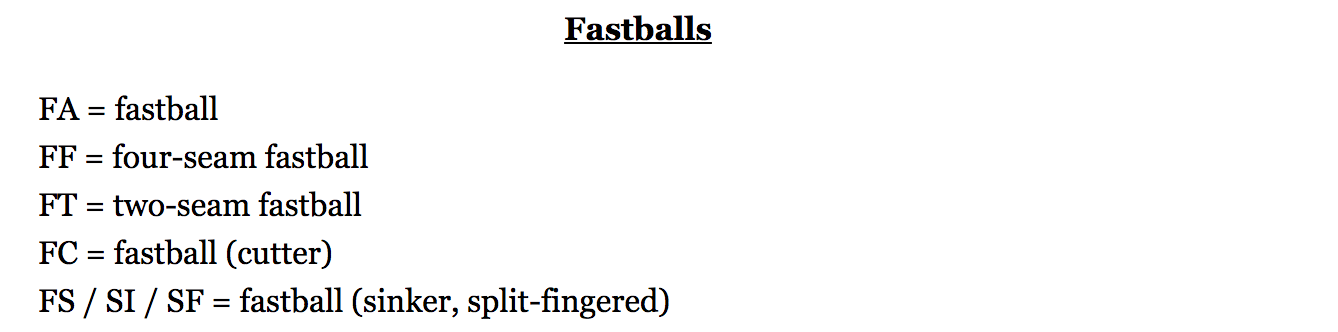

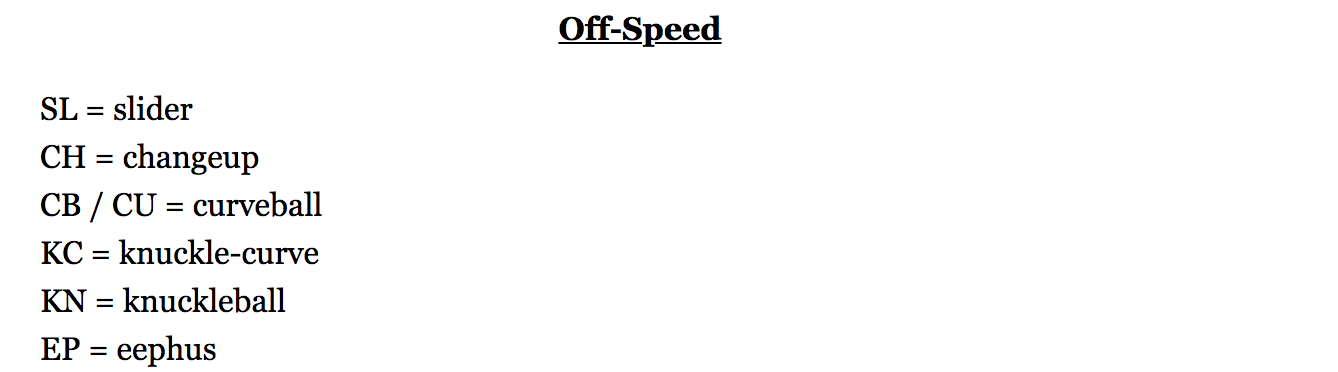

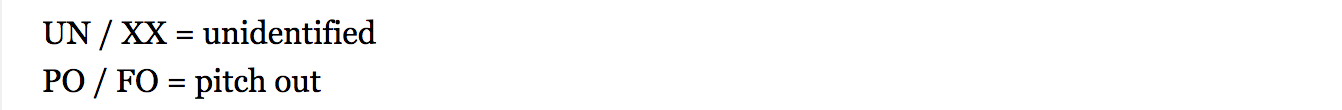

Let's plot the distribution of pitch types now.

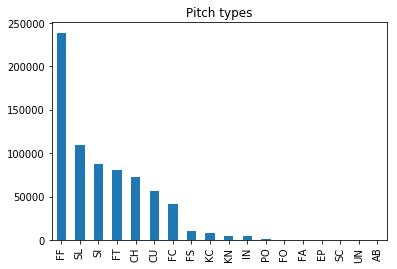

In [29]:
# Plotting the distribution of different pitches
df['pitch_type'].value_counts().plot('bar',title='Pitch types')
plt.show()

It also appears that many columns in the bottom half, including the target column, have a couple thousand null values.

In [30]:
df['pitch_type'].isnull().sum()

2280

Null values for the target variable must be removed, as that will just cause issues with making predictions.  Also note that with the excess of data at hand, removing these values should not have a negative impact.

In [31]:
df = df.dropna(subset=['pitch_type'])

In [32]:
df['pitch_type'].isnull().sum()

0

In [33]:
len(df)

716681

There are many numeric columns in the 20-40 range that could have some real impact on predictions, let's convert this subset of columns to it's own dataframe and compare some of them.

In [34]:
nums_df = df.iloc[:,36:59]

In [35]:
nums_df.describe()

,y,start_speed,end_speed,sz_top,sz_bot,pfx_x,pfx_z,px,pz,x0,...,y0,vx0,vz0,vy0,ax,az,ay,break_length,break_y,break_angle
count,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,...,716681.0,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000
mean,147.857376,87.362028,80.612666,3.398461,1.600354,-0.863183,4.767071,-0.062566,2.367194,-0.798869,...,50.0,2.204512,-4.202271,-127.875684,-1.818262,-23.389043,26.821424,6.755535,23.803143,4.086515
std,21.661838,6.153273,5.515286,0.206579,0.136247,6.322141,5.329747,0.956427,0.919507,1.703180,...,0.0,5.877975,3.100750,8.955758,10.613403,8.853820,4.521354,2.975481,0.072111,23.418248
min,0.000000,39.900000,38.000000,0.000000,0.000000,-21.640000,-26.190000,-8.857000,-3.027000,-5.811000,...,50.0,-20.963000,-18.657000,-150.573000,-34.903000,-70.144000,0.576000,0.200000,22.800000,-88.300000
25%,134.700000,83.500000,77.300000,3.260000,1.510000,-6.160000,1.850000,-0.680000,1.785000,-2.042000,...,50.0,-2.069000,-6.312000,-134.650000,-10.572000,-29.205000,23.574000,4.500000,23.800000,-12.500000
50%,147.650000,88.800000,81.900000,3.400000,1.600000,-1.660000,5.810000,-0.053000,2.369000,-1.390000,...,50.0,3.796000,-4.407000,-129.960000,-2.734000,-22.252000,26.776000,6.200000,23.800000,5.600000
75%,161.470000,92.000000,84.700000,3.540000,1.690000,4.170000,8.710000,0.561000,2.946000,0.638000,...,50.0,6.505000,-2.314000,-122.253000,6.380000,-16.510000,29.979000,8.200000,23.800000,23.900000
max,213.270000,103.400000,95.900000,4.310000,3.150000,25.060000,23.470000,8.814000,7.967000,9.446000,...,50.0,22.085000,12.507000,-58.178000,46.219000,6.562000,86.197000,34.100000,24.300000,269.200000


It will be interesting to see the correlation between these numbers, and observe which variables increase together, as well as observe the variables that have no relation with eachother.

In [127]:
# Generate correlation between numerical variables
corr = nums_df.corr()

In [128]:
# Construct and observe correlation matrix
corr

,y,start_speed,end_speed,sz_top,sz_bot,pfx_x,pfx_z,px,pz,x0,...,y0,vx0,vz0,vy0,ax,az,ay,break_length,break_y,break_angle
y,1.000000,-0.145145,-0.113384,-0.045656,-0.028220,0.022828,-0.210318,0.114967,-0.953755,0.001868,...,NaN,0.034300,-0.461624,0.152918,0.021349,-0.216688,-0.149722,0.224496,0.209067,-0.028890
start_speed,-0.145145,1.000000,0.988187,-0.005372,0.008600,-0.266214,0.659021,-0.011997,0.154166,-0.085410,...,NaN,0.169635,-0.567941,-0.999819,-0.262774,0.707924,0.765022,-0.839040,-0.226105,0.249852
end_speed,-0.113384,0.988187,1.000000,-0.005332,0.009664,-0.260792,0.629286,-0.006782,0.122774,-0.099075,...,NaN,0.179513,-0.579470,-0.988073,-0.257308,0.676797,0.661501,-0.826394,-0.087896,0.243874
sz_top,-0.045656,-0.005372,-0.005332,1.000000,0.741411,0.002274,0.014476,-0.003003,0.042112,0.015027,...,NaN,-0.013558,0.009181,0.005600,0.004986,0.009906,-0.008316,-0.006784,0.000684,-0.008099
sz_bot,-0.028220,0.008600,0.009664,0.741411,1.000000,-0.019319,0.012933,-0.025646,0.022819,0.001869,...,NaN,-0.005430,-0.002438,-0.008681,-0.016564,0.009492,0.000107,-0.012424,0.004991,0.013188
pfx_x,0.022828,-0.266214,-0.260792,0.002274,-0.019319,1.000000,-0.137534,0.175769,-0.023735,0.503788,...,NaN,-0.672477,0.108556,0.266289,0.991338,-0.142057,-0.208872,0.202032,0.075194,-0.945083
pfx_z,-0.210318,0.659021,0.629286,0.014476,0.012933,-0.137534,1.000000,0.016790,0.228765,0.076117,...,NaN,0.009582,-0.648460,-0.655811,-0.120267,0.986971,0.508608,-0.934547,-0.272803,0.121808
px,0.114967,-0.011997,-0.006782,-0.003003,-0.025646,0.175769,0.016790,1.000000,-0.123441,0.094070,...,NaN,0.271210,-0.093129,0.016201,0.167153,0.012316,-0.023042,-0.007264,0.032807,-0.176182
pz,-0.953755,0.154166,0.122774,0.042112,0.022819,-0.023735,0.228765,-0.123441,1.000000,-0.001712,...,NaN,-0.037321,0.477468,-0.162272,-0.022142,0.235035,0.148525,-0.242175,-0.208334,0.030397
x0,0.001868,-0.085410,-0.099075,0.015027,0.001869,0.503788,0.076117,0.094070,-0.001712,1.000000,...,NaN,-0.874181,-0.039410,0.087359,0.542457,0.066868,-0.031375,0.009171,-0.066287,-0.546024


A heatmap can give a good view of the correlations.

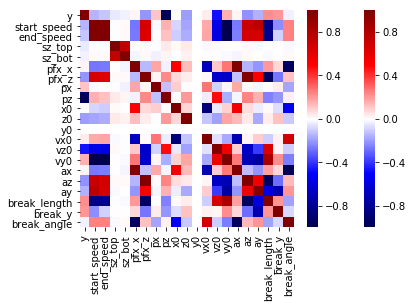

In [130]:
sns.heatmap(nums_df.corr(),cmap='seismic' )
plt.show()

This is very tough to visualize, but the naked eye can spot that there are several strong red squares, which indicate variables that have high positive correlations with each other.  On the other hand, the dark blue indicate very high negative correlations between variables.

Both of these metrics could point towards multicollinearity between the predictor variables.

In order to get distinct numbers, the correlation matrix can be unstacked and sorted by descending or ascending levels of correlation.

In [131]:
# Unstack matrix
s = corr.unstack()

In [132]:
# Sort values in descending order
sort = s.sort_values(kind="quicksort",ascending=False)

In [134]:
# All values that are 1.0 typically is just the correlation within itself.
sort[:10]

break_angle  break_angle    1.0
x0           x0             1.0
ay           ay             1.0
az           az             1.0
ax           ax             1.0
vy0          vy0            1.0
vz0          vz0            1.0
vx0          vx0            1.0
z0           z0             1.0
pz           pz             1.0
dtype: float64

In [139]:
# Check the middle of the sort
sort[20:40]

pfx_x         ax              0.991338
ax            pfx_x           0.991338
end_speed     start_speed     0.988187
start_speed   end_speed       0.988187
pfx_z         az              0.986971
az            pfx_z           0.986971
break_length  vy0             0.837849
vy0           break_length    0.837849
ay            start_speed     0.765022
start_speed   ay              0.765022
sz_top        sz_bot          0.741411
sz_bot        sz_top          0.741411
az            start_speed     0.707924
start_speed   az              0.707924
break_angle   vx0             0.688729
vx0           break_angle     0.688729
end_speed     az              0.676797
az            end_speed       0.676797
end_speed     ay              0.661501
ay            end_speed       0.661501
dtype: float64

Just as we suspected, there are several variables that have near perfect correlations with each other.  Before any features are removed, we should see if this multicollinearity actually hurts the performance of the classification models.  If the models falter, it might indicate that some features should be removed.

## Data conversions: Dummy variables and datetime's

There are many categorical variables that should be converted into dummy variables in order to be properly used.  Also, there are a few datetime variables that need to be converted as well.

In [36]:
# One-hot encoding all categorical variables to dummy variables
cat_df = pd.get_dummies(df[['event','p_throws','pitch_des','type','stand']])

In [37]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716681 entries, 26 to 718960
Data columns (total 55 columns):
event_Batter Interference              716681 non-null uint8
event_Bunt Groundout                   716681 non-null uint8
event_Bunt Lineout                     716681 non-null uint8
event_Bunt Pop Out                     716681 non-null uint8
event_Catcher Interference             716681 non-null uint8
event_Double                           716681 non-null uint8
event_Double Play                      716681 non-null uint8
event_Fan interference                 716681 non-null uint8
event_Field Error                      716681 non-null uint8
event_Fielders Choice                  716681 non-null uint8
event_Fielders Choice Out              716681 non-null uint8
event_Flyout                           716681 non-null uint8
event_Forceout                         716681 non-null uint8
event_Grounded Into DP                 716681 non-null uint8
event_Groundout                   

Categorial DF should be added to the original DF

In [38]:
# Concatenate current DF with dummy variable DF
df = pd.concat([df, cat_df], axis=1)

In [39]:
# Drop the original categorical columns that we don't need anymore
df.drop(['stand','p_throws','event','pitch_des','type'],axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716681 entries, 26 to 718960
Columns: 120 entries, uid to stand_R
dtypes: float64(28), int64(28), object(9), uint8(55)
memory usage: 398.5+ MB


55 columns were added to this df, but it was necessary to do proper analysis.

### Date-time  and height conversions

In [41]:
df['date'] = pd.to_datetime(df['date'])

To make the handling of dates easier, we're going to extract the month and day from the date and create new columns.  
Note: The year is not needed since all games were played in 2011.

In [42]:
# Drop year column
df.drop(['year'],axis=1,inplace=True)

In [43]:
# Create new month and day column, extracted from the date column
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [44]:
df.loc[:,['date','month','day']].head()

,date,month,day
26,2011-03-31,3,31
27,2011-03-31,3,31
28,2011-03-31,3,31
29,2011-03-31,3,31
30,2011-03-31,3,31


In [45]:
# Original date column no longer needed
df.drop(['date'],axis=1,inplace=True)

A few date-time columns such as 'created at','modified at', and 'added_at' can be dropped.  They have no relation to the game being played.

In [46]:
# Drop 3 date time columns
df.drop(['created_at','modified_at','added_at'],axis=1,inplace=True)

For the rest of the date-time columns, it seems like some of these values have a year of 0.
That error is concering so the columns will be dropped.

In [47]:
df.drop(['start_tfs','start_tfs_zulu','pitch_tfs','pitch_tfs_zulu'],axis=1,inplace=True)

A couple unique ID's have no relevance as well, and can safely be dropped.

In [48]:
df.drop(['uid','game_pk','batter_id'],axis=1,inplace=True)

The height column is shown as a string, it needs to converted to inches.

In [49]:
df['b_height'].value_counts()

6-2     134667
6-0     119224
6-1     111767
6-3      82166
5-11     67737
5-10     63970
6-4      56454
5-9      29772
6-5      24037
5-8      14530
6-6      10543
5-6        853
6-7        584
6-8        228
5-5         51
5-7         45
6-10        40
6-9         13
Name: b_height, dtype: int64

In [50]:
# Mapping each height in the column to an inches conversion.
df['b_height']=df['b_height'].map({'5-5':65,'5-6':66,'5-7':67,'5-8':68,'5-9':69,'5-10':70,'5-11':71,'6-0':72,'6-1':73,'6-2':74,'6-3':75,'6-4':76,'6-5':77,'6-6':78,'6-7':79,'6-8':80,'6-9':81,'6-10':82})

## Modeling

Time for modeling.  First, the data will be split into training and test sets.  The split performed will be an 80-20 ratio.  The training data is going to consist of about 573,344 samples, while the test set will consist of 143,336 samples.

In [51]:
# Reset index for simplicity
df.reset_index(inplace=True)

In [52]:
df.drop(['index'],axis=1,inplace=True)

We need to get a list of all the columns except for the target variable ('pitch type').

In [53]:
cols = list(df.columns.values)

In [54]:
# Remove target variable from list
cols.pop(cols.index('pitch_type'))

'pitch_type'

In [55]:
# Create dataframe of all columns except for one
X = df[cols]

In [56]:
# Create series for the target variable
y = df['pitch_type']

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716681 entries, 0 to 716680
Columns: 109 entries, team_id_b to day
dtypes: float64(27), int64(26), object(1), uint8(55)
memory usage: 332.9+ MB


In [58]:
# Import Train-Test Split
from sklearn.model_selection import train_test_split

In [59]:
# Split data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

## Logistic Regression

Logistic regression will be the first classification algorithm utilized,as it is a great baseline model which generally performs well.  It is also fairly simple to deploy and is interpretable.  If this model performs and generalizes well, there is reason to believe this data is linearly separable.

For this algorith, it usually performs better with standardized data.  So the training and test sets will be standardized before it is put into the model.

In [60]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler

In [61]:
# Initialize scaler object
std = StandardScaler()

In [62]:
# Fit and transform on the training data
X_train_std = std.fit_transform(X_train)

# Only transform on the test data 
X_test_std = std.transform(X_test)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  """


Now, we can initialize the logistic regression model.  First we'll run the model with default parameters, and a regularization C = 1.0.

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
# Initialize logistic regression object
logit = LogisticRegression()

In [66]:
# Fit the model on the training data
logit.fit(X_train_std,y_train)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
# Store all the predictions in the Y predictions array
y_pred = logit.predict(X_test_std)

In [68]:
# Also store probabiliies for each type of pitch
y_pred_proba = logit.predict_proba(X_test_std)

In [69]:
# Show first 50 predictions and compare to actual test set
y_pred[0:50]

array(['FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF',
       'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF',
       'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF',
       'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF',
       'FF', 'FF', 'FF', 'FF', 'FF', 'FF'], dtype=object)

It is clear from the start that logistic regression performed very poorly on this data.  The four-seam fastball (FF) was predicted as the type of pitch every single time.  This is a strong sign that this data is NOT linearly separable, and another model of choice should be used.

In [70]:
y_test[:50]

142283    SL
370280    FF
372117    FF
439747    FF
144139    FF
13440     CU
103932    FF
358947    FF
3764      CH
334264    SI
333415    FT
500245    FF
427965    FF
250268    CH
85497     FF
448981    IN
253051    FF
261792    SI
519046    SI
373859    SI
333502    FF
223090    SL
370084    FT
308304    SL
247604    SL
591954    FF
563201    SI
666483    SI
319990    FT
319851    FS
349786    SL
410765    FT
377782    CU
76360     FF
129025    FF
687211    SL
483628    CU
143027    SI
60632     CH
692240    SI
334133    CH
6340      SI
578409    FF
607464    FT
378313    FT
334214    SI
606397    SL
12185     SL
329646    FT
384708    CH
Name: pitch_type, dtype: object

In [71]:
# Import classification report to see relevant metrics
from sklearn.metrics import classification_report

In [72]:
# Show report based off curent predictions
print(classification_report(y_test,logit.predict(X_test_std)))

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          CH       0.00      0.00      0.00     14528
          CU       0.00      0.00      0.00     11276
          EP       0.00      0.00      0.00        27
          FA       0.00      0.00      0.00        41
          FC       0.00      0.00      0.00      8340
          FF       0.33      1.00      0.50     47709
          FO       0.00      0.00      0.00        66
          FS       0.00      0.00      0.00      2101
          FT       0.00      0.00      0.00     16211
          IN       0.00      0.00      0.00       812
          KC       0.00      0.00      0.00      1698
          KN       0.00      0.00      0.00       890
          PO       0.00      0.00      0.00       112
          SC       0.00      0.00      0.00        24
          SI       0.00      0.00      0.00     17548
          SL       0.00      0.00      0.00     21951
          UN       0.00      0.00      0.00         3

   micro avg       0.33   

Before we move on, we can attempt to tune a couple parameters of the model to possibly improve the performance.

### Add class_weight = balanced_argument to Logistic Regression and increase C reguralization parameter.

Adding a balanced argument as the class weight uses the values of y to automatically adjust weights inversely proportional to class frequencies.  This can be useful since the four-seam fastball occurs much more frequently than any other type of pitch. 

The C parameter is known as the inverse of regularization strength, so an increase in the C value will increase the reg strenth.  This could lead to a better fit on the training data.  

In [74]:
# Adjust parameters and initialize new model
logit_bal = LogisticRegression(C=10.0,class_weight='balanced')

In [75]:
# Fit model with new parameters
logit_bal.fit(X_train_std,y_train)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=10.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [76]:
# Store predicted y values
y_pred_bal = logit_bal.predict(X_test)

In [77]:
# New predictions
y_pred_bal[:50]

array(['FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'SC', 'FF', 'FF', 'FF',
       'FF', 'FF', 'FF', 'FF', 'EP', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF',
       'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'SC',
       'FF', 'FF', 'FF', 'FF', 'SC', 'SC', 'FF', 'FF', 'SC', 'SC', 'SC',
       'FF', 'FF', 'EP', 'FF', 'FF', 'SC'], dtype=object)

In [78]:
print(classification_report(y_test,logit_bal.predict(X_test)))

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

          AB       0.00      0.00      0.00         0
          CH       0.00      0.00      0.00     14528
          CU       0.00      0.00      0.00     11276
          EP       0.00      0.48      0.00        27
          FA       0.00      0.00      0.00        41
          FC       0.00      0.00      0.00      8340
          FF       0.34      0.73      0.47     47709
          FO       0.00      0.00      0.00        66
          FS       0.00      0.00      0.00      2101
          FT       0.00      0.00      0.00     16211
          IN       0.00      0.00      0.00       812
          KC       0.00      0.00      0.00      1698
          KN       0.00      0.00      0.00       890
          PO       0.00      0.00      0.00       112
          SC       0.00      1.00      0.00        24
          SI       0.00      0.00      0.00     17548
          SL       0.00      0.00      0.00     21951
          UN       0.00    

The changes of parameters hardly made a difference, as almost every predicted class was still the four-seam fastball.  We can conclude that this data is not linearly separable, and a different algorithm needs to be implemented get stronger predictions.

## Random Forest (Ensemble of decision trees)

There is a good chance that random forest performs better on this data set, as it is known for it's good classification performance and scalability.  

As this algorithm will use an ensemble method by averaging multiple decision trees, and randomly sampling with replacement, it should build a robust model with better generalization performance.

Another positive about this algorithm, is that it takes little to no hyperparameter tuning to generate a model, and it is scale invariant.  So, we do not have to worry about feeding in standardized data.

In [79]:
# Import random forest form ensemble class
from sklearn.ensemble import RandomForestClassifier

In [118]:
# Initialize random forest object
rf = RandomForestClassifier(n_estimators=10)

In [148]:
# Fit on training data
rf_model = rf.fit(X_train,y_train)

In [149]:
# Store predictions in array
y_pred = rf_model.predict(X_test)

In [121]:
# See what we got
y_pred[0:50]

array(['SL', 'SL', 'FF', 'FF', 'FF', 'CU', 'FF', 'FF', 'CH', 'SI', 'FT',
       'FF', 'FF', 'CH', 'FF', 'IN', 'FF', 'SI', 'SI', 'SI', 'FF', 'CU',
       'FT', 'SL', 'SL', 'FF', 'FT', 'SI', 'FT', 'SI', 'SL', 'FT', 'CU',
       'FF', 'FF', 'SL', 'CU', 'SI', 'CH', 'FT', 'CH', 'SI', 'FF', 'FT',
       'FF', 'SI', 'CU', 'CU', 'FF', 'CH'], dtype=object)

In [96]:
# We can predict probability of each class as well
y_pred_proba = rf.predict_proba(X_test)

In [97]:
y_pred_proba[:10]

array([[0. , 0. , 0.1, 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0.7, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.3, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0.5, 0. ],
       [0. , 0.1, 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0.5, 0. , 0. , 0. ,
        0. , 0. , 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0.4, 0. , 0. , 0.4, 0. , 0. , 0. ,
        0. , 0. , 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.3, 0. , 0. , 0. ,
        0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0.1, 0. , 0. , 0. ,
        0. , 0. , 0.3, 0. , 0. ],
       [0. , 0.7, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. ,
        0. , 0. , 0. , 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. ,

For each sample there are many values of 0, this shows that this model is able to fully eliminate a lot of pitches as even small possibilities of being the correctly predicted pitch.

In [86]:
y_test[:15]

142283    SL
370280    FF
372117    FF
439747    FF
144139    FF
13440     CU
103932    FF
358947    FF
3764      CH
334264    SI
333415    FT
500245    FF
427965    FF
250268    CH
85497     FF
Name: pitch_type, dtype: object

From a first glance, it seems like this algorithm generalized very well on the test set.  Let's print a classification report to confirm this.

In [150]:
print(classification_report(y_test,rf_model.predict(X_test)))

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          CH       0.85      0.91      0.88     14528
          CU       0.88      0.93      0.91     11276
          EP       1.00      0.30      0.46        27
          FA       0.00      0.00      0.00        41
          FC       0.78      0.68      0.73      8340
          FF       0.88      0.93      0.90     47709
          FO       1.00      0.33      0.50        66
          FS       0.85      0.40      0.54      2101
          FT       0.79      0.74      0.77     16211
          IN       1.00      1.00      1.00       812
          KC       0.93      0.58      0.72      1698
          KN       0.98      0.89      0.94       890
          PO       1.00      0.92      0.96       112
          SC       1.00      0.75      0.86        24
          SI       0.93      0.85      0.89     17548
          SL       0.86      0.90      0.88     21951
          UN       1.00      1.00      1.00         3

   micro avg       0.87   

The random forest model performed very well, with the only parameter being tuned was the number of trees to grow at each sample.  A couple of the pitch types were even classified perfectly on the test data.

We can also run K-fold cross validation sets, where this model will see many test sets, and can hopefully output a similar performance at each fold.

## K-Folds Cross Validation (random forest)

The validation will be performed with 10 equal splits, as this is a general practice for cross-validation.

In [90]:
# Import stratified K-fold
from sklearn.model_selection import StratifiedKFold

In [91]:
# Intialize k-fold with 10 splits
kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train,y_train)

The metric that will be used to evaluate the performance at each fold is a weighted F1 score, which is a good balance of precision and recall.  The weighted portion allows the scoring to be extended to multiclassification.

In [93]:
from sklearn.metrics import f1_score

In [94]:
scores = []
for train,test in kfold:
    rf.fit(X_train, y_train)
    score = f1_score(y_test,rf.predict(X_test),average='weighted')
    scores.append(score)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [95]:
scores

[0.8698180516403929,
 0.8640212067702175,
 0.8659012590623236,
 0.8702610573301767,
 0.8703498931559256,
 0.8661345394603819,
 0.8681135584181104,
 0.8676622870692308,
 0.8661178145329793]

As the model was evaluated on 10 equal folds, we can see that the weighted F1 score does not fluctuate much at all through each iteration.  Overall, it is safe to say that this model generalizes well on unseen data.

## PCA Dimensionality Reduction

The random forest model performed well with almost all features included, but with dimensionality reduction we can remove some of the less relevant features and possibly improve performance.

With this technique, the feature space will be reduced to 50 components, to see if we can ultimately predict better and explain the data better with less features in the process.

Scaling is an important part of this algorithm, so we will fit PCA on scaled data.

In [98]:
from sklearn.decomposition import PCA

In [99]:
# Initialiaze PCA with 50 principal components
pca = PCA(n_components=50)

In [100]:
X_train_pca = pca.fit_transform(X_train_std)

In [101]:
X_test_pca = pca.transform(X_test_std)

The explained variance allows us to see the principal components that explain the most variance, in descending order.

In [102]:
# Explained variance ratio of 50 components, equaling to 1
pca.explained_variance_ratio_

array([0.06921332, 0.04999315, 0.03708658, 0.03528219, 0.03417963,
       0.03289036, 0.02834579, 0.02299135, 0.02170196, 0.02159503,
       0.01962799, 0.01856818, 0.01780331, 0.01603917, 0.01552563,
       0.01455828, 0.01379756, 0.01288003, 0.0124836 , 0.01209979,
       0.01141673, 0.01089516, 0.01069108, 0.01038857, 0.01021053,
       0.01000541, 0.00983473, 0.00982495, 0.00973   , 0.00972344,
       0.00955922, 0.00954508, 0.00945985, 0.00943129, 0.00938144,
       0.00934464, 0.00928794, 0.00928187, 0.00926571, 0.00926441,
       0.00925324, 0.00924655, 0.00924157, 0.0092308 , 0.00920348,
       0.00919112, 0.00915453, 0.00912387, 0.00909018, 0.00905997])

In [104]:
# This shows this co-variance associated with each component
pca.components_[0]

array([ 1.32004452e-03,  1.76518154e-02, -2.84249884e-02, -3.28351410e-03,
       -2.85149913e-02,  8.53447593e-03,  4.52052904e-02, -2.15842968e-02,
        3.75201393e-02,  1.85256549e-02,  1.00159997e-02,  4.77120611e-03,
       -1.05885322e-02,  1.81283127e-02,  1.14063982e-02,  5.64760550e-03,
       -3.01589293e-02, -1.97833681e-02, -1.58096039e-02,  5.61537083e-04,
       -3.01177398e-02, -3.05895242e-02,  6.46558971e-02,  2.00590258e-03,
       -3.18903347e-01, -3.07866879e-01,  2.90691338e-03, -4.30586251e-03,
        2.19888709e-01, -2.68117131e-01,  2.92936011e-02, -6.80617828e-02,
        1.25618476e-01,  5.12246456e-02, -6.61078950e-21, -1.65899008e-01,
        2.00130388e-01,  3.18687640e-01,  2.20130214e-01, -2.80703103e-01,
       -2.65018752e-01,  3.05023366e-01,  1.16727935e-01, -2.16274840e-01,
        3.57480884e-02,  4.37163020e-02, -4.08494461e-02, -1.85336037e-01,
       -1.91971309e-01, -4.62180504e-03,  1.54173833e-02,  1.22993968e-02,
        3.28368277e-04, -

In [105]:
# Convert components to a DataFrame
components_50 = pd.DataFrame(pca.components_,columns=X_train.columns)

In [107]:
components_50.shape

(50, 109)

By converting these components to a dataframe, we can see the actual feature names that provide the most explanations of our data.

In [108]:
components_50.iloc[:,:10].head()

,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls
0,0.001320,0.017652,-0.028425,-0.003284,-0.028515,0.008534,0.045205,-0.021584,0.037520,0.018526
1,0.009401,-0.034242,0.041665,0.000819,0.042217,0.006816,0.010878,-0.008925,0.020200,0.013741
2,-0.002134,-0.000609,-0.001568,0.003599,-0.002438,0.176036,0.026166,0.129326,0.156161,0.133794
3,-0.009260,0.002557,0.423391,-0.013241,0.444645,0.086128,-0.020759,0.054497,0.084946,0.072030
4,0.001304,-0.004137,0.150961,-0.013772,0.159302,0.170053,0.006513,0.157377,0.121162,0.110593


In [109]:
components_50.iloc[:,10:20].head()

,outs,is_final_pitch,final_balls,final_strikes,final_outs,b_height,pitcher_id,away_team_runs,home_team_runs,score
0,0.010016,0.004771,-0.010589,0.018128,0.011406,0.005648,-0.030159,-0.019783,-0.015810,0.000562
1,0.010677,0.012145,-0.002303,-0.008034,0.008460,0.003175,-0.049335,0.023343,0.021821,0.003733
2,-0.008434,0.374554,-0.204493,-0.030640,0.031853,-0.020435,-0.006654,-0.001508,-0.002441,0.026120
3,0.065810,-0.069370,0.026434,0.189284,0.086218,0.005207,0.038015,0.300807,0.293127,-0.030906
4,-0.004986,0.209758,0.173197,-0.231230,-0.083223,-0.011808,0.016924,0.106596,0.107067,0.064043


In [110]:
components_50.iloc[:,20:30].head()

,pitch_id,x,y,sv_id,start_speed,end_speed,sz_top,sz_bot,pfx_x,pfx_z
0,-0.030118,-0.030590,0.064656,0.002006,-0.318903,-0.307867,0.002907,-0.004306,0.219889,-0.268117
1,0.041245,0.048662,0.048382,-0.003902,-0.136741,-0.125062,-0.002558,0.007369,-0.277411,-0.198538
2,-0.001357,0.040742,-0.094850,0.004048,0.002879,0.002239,-0.046220,-0.020846,0.001045,-0.014264
3,0.446854,-0.022228,-0.016291,0.013752,0.024862,0.021176,-0.006149,-0.004275,0.049478,-0.034784
4,0.161405,-0.028093,0.047669,-0.003543,0.019878,0.020622,-0.002767,0.001542,0.020588,0.020607


Now that we've seen about the top half of our most important components, we'll run our previous random forest model to see if any improvements can come from it.

In [111]:
# Run random forest model with 50 principal components
rf.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
y_pred_pca = rf.predict(X_test_pca)

In [114]:
y_pred_pca[:50]

array(['SL', 'FF', 'FF', 'FT', 'FF', 'CU', 'FF', 'FT', 'SI', 'SI', 'FT',
       'FF', 'FF', 'CH', 'FF', 'IN', 'FF', 'FT', 'SI', 'SI', 'FF', 'CU',
       'FT', 'SL', 'SL', 'FF', 'SI', 'FT', 'FF', 'SI', 'SL', 'FT', 'CU',
       'FF', 'FF', 'CH', 'CU', 'FF', 'CH', 'SI', 'CH', 'CH', 'FF', 'FF',
       'FF', 'FF', 'CU', 'CU', 'FF', 'CH'], dtype=object)

In [116]:
y_test[:15]

142283    SL
370280    FF
372117    FF
439747    FF
144139    FF
13440     CU
103932    FF
358947    FF
3764      CH
334264    SI
333415    FT
500245    FF
427965    FF
250268    CH
85497     FF
Name: pitch_type, dtype: object

In [117]:
print(classification_report(y_test,rf.predict(X_test_pca)))

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          CH       0.68      0.80      0.74     14528
          CU       0.76      0.84      0.80     11276
          EP       0.00      0.00      0.00        27
          FA       0.00      0.00      0.00        41
          FC       0.55      0.31      0.40      8340
          FF       0.74      0.88      0.81     47709
          FO       0.00      0.00      0.00        66
          FS       0.33      0.05      0.09      2101
          FT       0.49      0.37      0.42     16211
          IN       1.00      1.00      1.00       812
          KC       0.41      0.05      0.08      1698
          KN       0.88      0.37      0.52       890
          PO       1.00      0.99      1.00       112
          SC       0.67      0.08      0.15        24
          SI       0.62      0.49      0.55     17548
          SL       0.74      0.81      0.77     21951
          UN       0.00      0.00      0.00         3

   micro avg       0.70   

After seeing the classification report, it is clear that reducing the dimensionality drastically decreased the scores of our model at all levels.

This is a sign that a very high percentage of the original features are relevant and important for accurately predicting the type of pitch.

## Final thoughts and future steps

Two main classifications were performed in this process, as well as dimensionality reduction, with one algorithm performing much better than others.  Random forest was able to generalize pretty well and predict the type of pitch with a somewhat high level of confidence.  

Due to time contraints, I was not able to utilize all the techniques and algorithms at my disposal.  In the future, I would take the time to search for optimal paramters by using grid search or randomized search.  A couple classifiers that I would highly consider using are support vector machine and gradient boosting classifier.  I suspect these algorithms will generalize at a high level due to the nature of this data, but they are both computationally expensive and take several steps of hyperparameter tuning.  Lastly, I would also like dedicate more time to exploratory data analysis, and get a better feel for the data and distributions throughout the variables.

Ultimately, I would measure success by evaluating the macro and weighted average of F1-score, as well as precision and recall.  These metrics explain performance well, and are easily extended for multiclassification problems like this.